INTRO

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [49]:
url = 'nba.csv'
data = pd.read_csv(url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


Q1

In [50]:
fixed= data.dropna()
fixed[['Age','Height','Weight','Salary']].head(3)

,Age,Height,Weight,Salary
0,25.0,6-2,180.0,7730337.0
1,25.0,6-6,235.0,6796117.0
3,22.0,6-5,185.0,1148640.0


Q2

In [51]:
data['Height']= data['Height'].replace("-", ".", regex= True)
data['Height'].head(3)

0    6.2
1    6.6
2    6.5
Name: Height, dtype: object

<AxesSubplot:xlabel='Position', ylabel='count'>

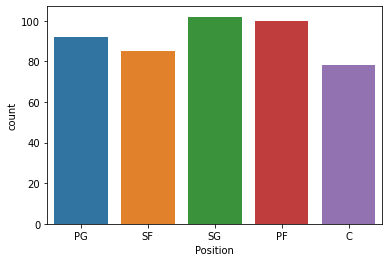

In [52]:
sns.countplot(x='Position', data= data)

<AxesSubplot:ylabel='Position'>

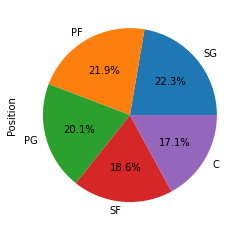

In [53]:
data['Position'].value_counts().plot.pie(autopct='%1.1f%%')

Q3

In [66]:
nba_df= data.dropna(axis=0)
nba_df['Height']= nba_df['Height'].astype(float)
nba_df['Height']= nba_df['Height'].replace('-', '.')

##nba_df.info()
##nba_df.head()

<ipython-input-66-4774eca3662b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_df['Height']= nba_df['Height'].astype(float)
<ipython-input-66-4774eca3662b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_df['Height']= nba_df['Height'].replace('-', '.')


Q4

In [69]:
features = ['Age', 'Height', 'Weight']
X= nba_df[features]
y= nba_df['Salary']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size= 0.3, random_state= 42)

In [72]:
X.head()
y.head()

0    7730337.0
1    6796117.0
3    1148640.0
6    1170960.0
7    2165160.0
Name: Salary, dtype: float64

Q5

In [76]:
model = sk.tree.DecisionTreeClassifier(random_state = 0) ##מודל שמתאים לחיזוי סיווג (לא למספרים)
model.fit(X_train, y_train)
pred = model.predict(X_test)
sk.metrics.accuracy_score(pred, y_test)

In [80]:
model_2 = sk.tree.DecisionTreeClassifier(criterion='gini')
model_2.fit(X,y)
txt_rps = tree.export_text(model_2)